## Blue Gene/L

In [10]:
# Load Blue Gene Data
df_bgl = pd.read_csv('Dataset/BGLErrorLog.txt', names = ['Timestamp', 'Node', 'Card', 'Message'])

df_bgl.loc[:,'Node'] = df_bgl.loc[:,'Timestamp'].str.split(' ', n=3).str[1]
df_bgl.loc[:,'Card'] = df_bgl.loc[:,'Timestamp'].str.split(' ', n=3).str[2]
df_bgl.loc[:,'Message'] = df_bgl.loc[:,'Timestamp'].str.split(' ', n=3).str[3]
df_bgl.loc[:,'Timestamp'] = df_bgl.loc[:,'Timestamp'].str.split(' ', n=3).str[0]

print('Log file has ' + str(df_bgl.shape[0]) + ' entries and ' + str(df_bgl.shape[1]) + ' columns.')
df_bgl.head()

Log file has 125624 entries and 4 columns.


,Timestamp,Node,Card,Message
0,1128621350,R00-M0-N0,J18-U01,Lustre mount FAILED : bglio2 : block_id : loc...
1,1128621350,R01-M1-N0,J18-U11,Lustre mount FAILED : bglio21 : block_id : lo...
2,1128621351,R07-M0-NC,J18-U01,Lustre mount FAILED : bglio124 : block_id : l...
3,1128621351,R00-M0-N4,J18-U01,Lustre mount FAILED : bglio4 : block_id : loc...
4,1128621351,R02-M0-N4,J18-U01,Lustre mount FAILED : bglio36 : block_id : lo...


### Data Manipulation

#### Sensitivity analysis

File already exists!



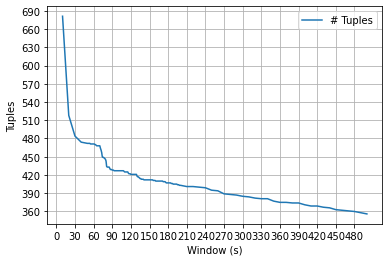

In [11]:
c_wins = np.arange(10,510,10)
accuracy = np.arange(50,200,1)
c_wins = c_wins.tolist()
c_wins.extend(accuracy)
c_wins.sort()

filepath = 'Dataset/BGLSensitivity.txt'
sensitivity_analysis(df_bgl, c_wins, filepath)

df_bgl_sensitivity = pd.read_csv(filepath, sep = ' ', names = ['Window', 'Tuples'])

plt.plot(df_bgl_sensitivity['Window'],df_bgl_sensitivity['Tuples'], label = '# Tuples')
plt.xticks(np.arange(0, 500, step = 30))
plt.yticks(np.arange(360, 700, step = 30))
plt.xlabel('Window (s)')
plt.ylabel('Tuples')
plt.grid()
plt.legend()